# Fitting for the Hubble constant with supernovae

We will now use a linear $\chi^2$ fit with uncertainties to fit the Hubble constant again with the redshift of supernovae by using data from [here](http://dark.dark-cosmology.dk/~tamarad/SN/). 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from chi_square_fit import chi_square_fit

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

 Chi-square fit of supernova data to a straight line
 Reference: http://dark.dark-cosmology.dk/~tamarad/SN/
 slope = 5.553327622696328  +-  0.025671639084390727
 intercept = 44.15213014489616 +- 0.02203670747286835
 chi-square/d.o.f. =  1.188795076768148


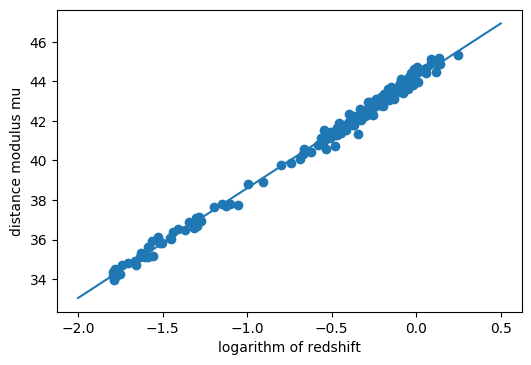

In [3]:
print (' Chi-square fit of supernova data to a straight line')
print (' Reference: http://dark.dark-cosmology.dk/~tamarad/SN/')


data = np.genfromtxt(fname='Davis07_R07_WV07.dat', usecols=range(1,4),comments=';')


logz_data = np.log10(data[:,0])
mu_data = data[:,1]
mu_err_data = data[:,2]

selection = mu_err_data < 0.0000001
if mu_err_data[ selection ].any():
    print ('Error! Uncertainties are too small!')
    exit()

plt.scatter( logz_data, mu_data )

fit = chi_square_fit(logz_data, mu_data, mu_err_data)
print (' slope =', fit[1], ' +- ', fit[3])
print (' intercept =', fit[0], '+-', fit[2])
if len(data) - 2 > 0 :
    print (' chi-square/d.o.f. = ', fit[4]/(len(data)-2))
else :
    print (' chi-square/d.o.f. undefined')

logz_data_vals = np.linspace(-2,0.5,10)
fitline = fit[0] + fit[1] * logz_data_vals
plt.plot(logz_data_vals,fitline)
plt.xlabel("logarithm of redshift")
plt.ylabel("distance modulus mu")
plt.show()